In [1]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np

In [2]:
cmap = 'spring'

In [3]:
fin1 = xr.open_dataset('CLM5_current_surf_deg025.nc')
fin2 = xr.open_dataset('CLM5_current_luhpasture_deg025.nc')
fin3 = xr.open_dataset('CLM5_current_luhother_deg025.nc')
fin4 = xr.open_dataset('CLM5_current_luhforest_deg025.nc')

fin1['lon'] = fin1.lon * 0.25 - 180. + 1./8.
fin1['lat'] = fin1.lat * 0.25 - 90. + 1./8.

fin2['lon'] = fin2.lon * 0.25 - 180. + 1./8.
fin2['lat'] = fin2.lat * 0.25 - 90. + 1./8.

fin3['lon'] = fin3.lon * 0.25 - 180. + 1./8.
fin3['lat'] = fin3.lat * 0.25 - 90. + 1./8.

fin4['lon'] = fin4.lon * 0.25 - 180. + 1./8.
fin4['lat'] = fin4.lat * 0.25 - 90. + 1./8.

In [4]:
fin1['PCT_NAT_PFT'] = fin1['PCT_NAT_PFT'].assign_attrs({'long_name':'PFT percentage, CLM5_current_surf_deg025.nc'})

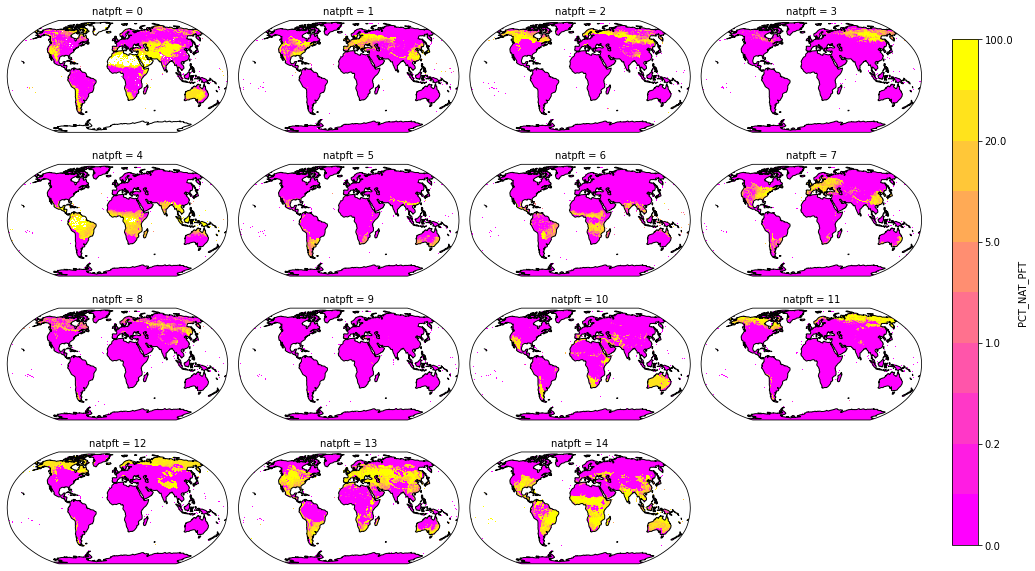

In [5]:
fg = (fin1.PCT_NAT_PFT*fin1.PCT_NAT_PFT.sum(dim='natpft')/fin1.PCT_NAT_PFT.sum(dim='natpft')).plot(x='lon',y='lat',col='natpft', col_wrap=4, cmap=cmap, levels=[0.,0.1,0.2,0.5,1.,2.,5.,10.,20.,50.,100], transform=ccrs.PlateCarree(), subplot_kws=dict(projection=ccrs.Robinson()), add_colorbar=False)

for ax in fg.axes.flat:
    ax.coastlines()
    
fg.add_colorbar(orientation="vertical", shrink=0.6, anchor=(1.5, 0.5))

plt.subplots_adjust(hspace=-0.65)

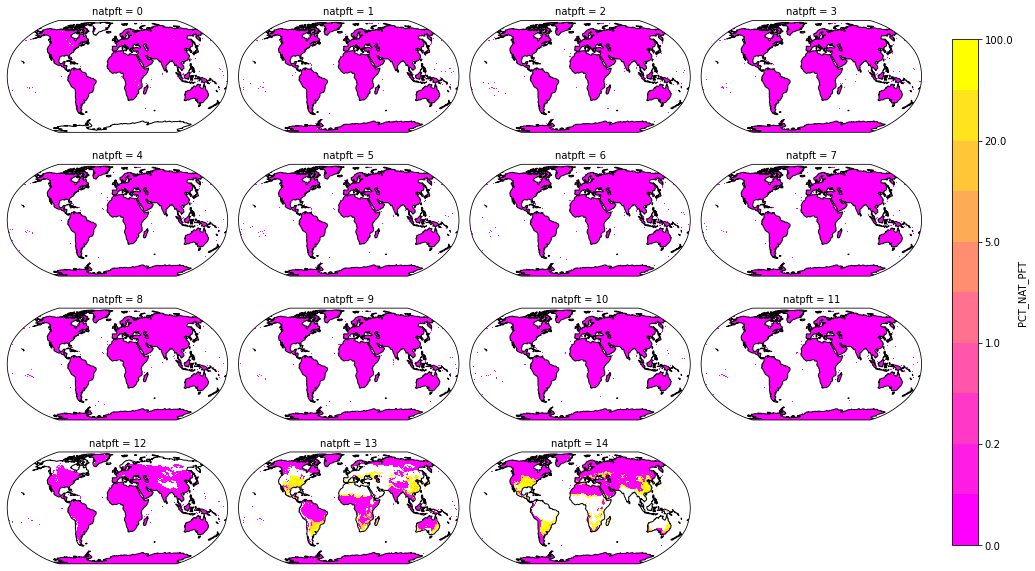

In [6]:
#(fin2.PCT_NAT_PFT*fin2.PCT_NAT_PFT.sum(dim='natpft')/fin2.PCT_NAT_PFT.sum(dim='natpft')).plot(x='lon',y='lat',col='natpft', col_wrap=4)

fg = (fin2.PCT_NAT_PFT*fin2.PCT_NAT_PFT.sum(dim='natpft')/fin2.PCT_NAT_PFT.sum(dim='natpft')).plot(x='lon',y='lat',col='natpft', col_wrap=4, cmap=cmap, levels=[0.,0.1,0.2,0.5,1.,2.,5.,10.,20.,50.,100], transform=ccrs.PlateCarree(), subplot_kws=dict(projection=ccrs.Robinson()), add_colorbar=False)

for ax in fg.axes.flat:
    ax.coastlines()
    
fg.add_colorbar(orientation="vertical", shrink=0.6, anchor=(1.5, 0.5))

plt.subplots_adjust(hspace=-0.65)

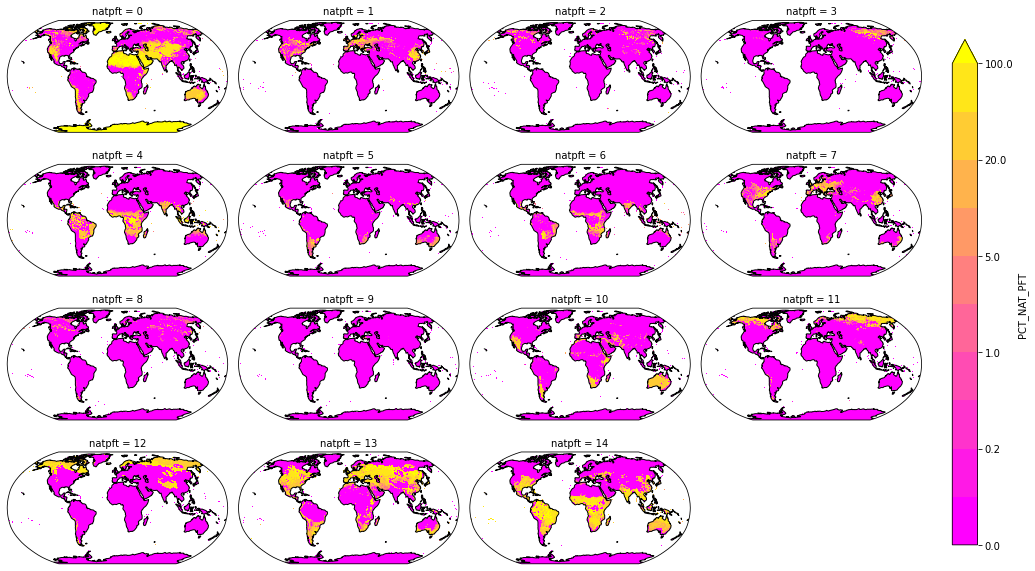

In [7]:
#(fin3.PCT_NAT_PFT*fin3.PCT_NAT_PFT.sum(dim='natpft')/fin3.PCT_NAT_PFT.sum(dim='natpft')).plot(x='lon',y='lat',col='natpft', col_wrap=4)


fg = (fin3.PCT_NAT_PFT*fin3.PCT_NAT_PFT.sum(dim='natpft')/fin3.PCT_NAT_PFT.sum(dim='natpft')).plot(x='lon',y='lat',col='natpft', col_wrap=4, cmap=cmap, levels=[0.,0.1,0.2,0.5,1.,2.,5.,10.,20.,50.,100], transform=ccrs.PlateCarree(), subplot_kws=dict(projection=ccrs.Robinson()), add_colorbar=False)

for ax in fg.axes.flat:
    ax.coastlines()
    
fg.add_colorbar(orientation="vertical", shrink=0.6, anchor=(1.5, 0.5))

plt.subplots_adjust(hspace=-0.65)

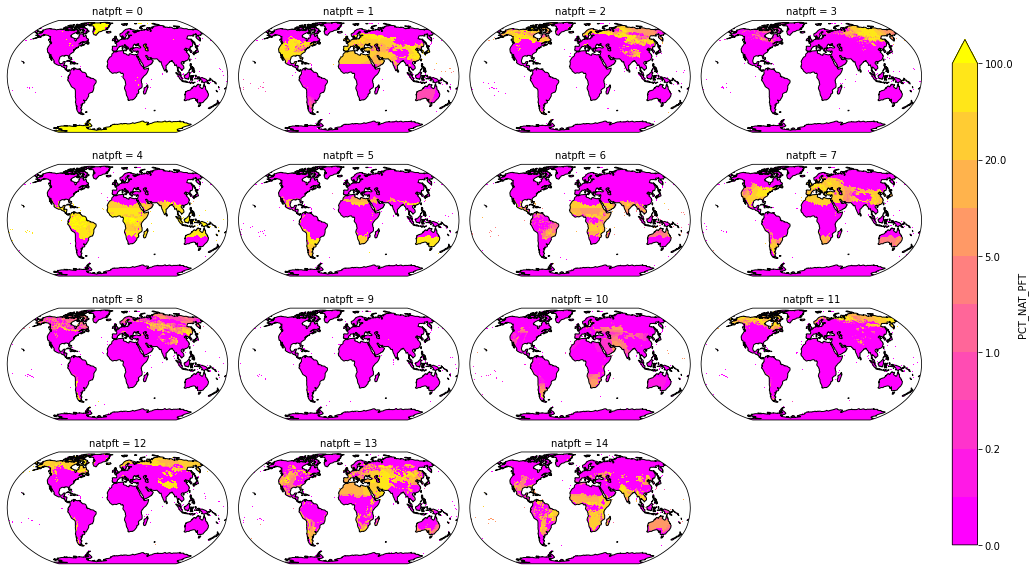

In [8]:
#(fin4.PCT_NAT_PFT*fin4.PCT_NAT_PFT.sum(dim='natpft')/fin4.PCT_NAT_PFT.sum(dim='natpft')).plot(x='lon',y='lat',col='natpft', col_wrap=4)


fg = (fin4.PCT_NAT_PFT*fin4.PCT_NAT_PFT.sum(dim='natpft')/fin4.PCT_NAT_PFT.sum(dim='natpft')).plot(x='lon',y='lat',col='natpft', col_wrap=4, cmap=cmap, levels=[0.,0.1,0.2,0.5,1.,2.,5.,10.,20.,50.,100], transform=ccrs.PlateCarree(), subplot_kws=dict(projection=ccrs.Robinson()), add_colorbar=False)

for ax in fg.axes.flat:
    ax.coastlines()
    
fg.add_colorbar(orientation="vertical", shrink=0.6, anchor=(1.5, 0.5))

plt.subplots_adjust(hspace=-0.65)

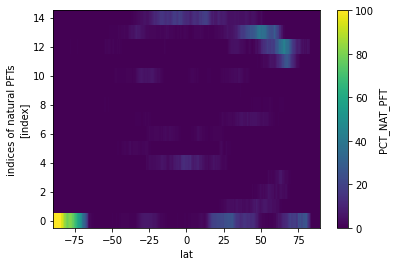

In [9]:
fin3.PCT_NAT_PFT.mean(dim='lon').plot()

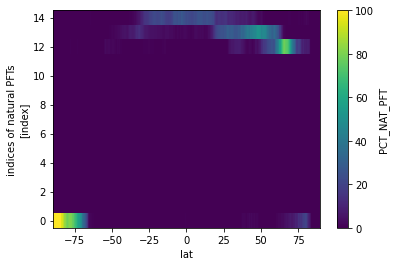

In [10]:
fin2.PCT_NAT_PFT.mean(dim='lon').plot()

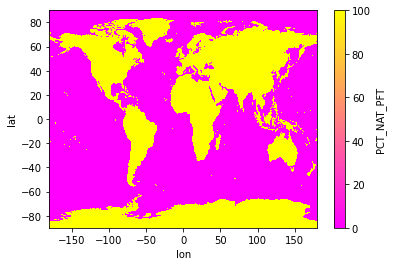

In [11]:
fin1.PCT_NAT_PFT.sum(dim='natpft').plot(cmap=cmap)

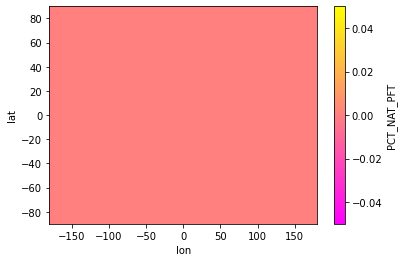

In [12]:
((fin1.PCT_NAT_PFT.sum(dim='natpft') > 0.00001) * (fin2.PCT_NAT_PFT.sum(dim='natpft') < 99.99999)).plot(cmap=cmap)

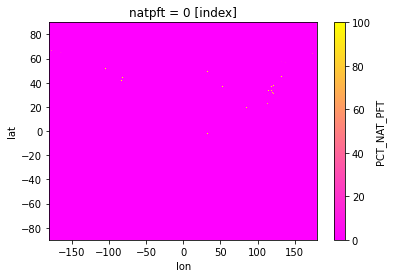

In [13]:
(fin1.PCT_NAT_PFT.isel(natpft=0) - fin3.PCT_NAT_PFT.isel(natpft=0)).plot(cmap=cmap)

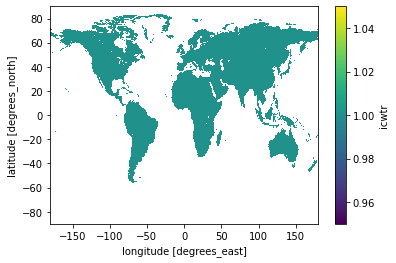

In [14]:
luh2_staticdata = xr.open_dataset('../staticData_quarterdeg.nc')
landoceanmask = (1.-luh2_staticdata.icwtr) / (1.-luh2_staticdata.icwtr)
landoceanmask.plot()

In [15]:
luh2_staticdata

<xarray.Dataset>
Dimensions:     (lon: 1440, lat: 720, bounds: 2)
Coordinates:
  * lon         (lon) float64 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
  * lat         (lat) float64 89.88 89.62 89.38 89.12 ... -89.38 -89.62 -89.88
Dimensions without coordinates: bounds
Data variables:
    ptbio       (lat, lon) float32 ...
    fstnf       (lat, lon) float32 ...
    carea       (lat, lon) float32 ...
    icwtr       (lat, lon) float32 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 1.0
    ccode       (lat, lon) float32 ...
    lat_bounds  (lat, bounds) float32 ...
    lon_bounds  (lon, bounds) float32 ...
Attributes: (12/17)
    history:           Processed: 2016-10-12T14:10:57Z
    host:              UMD College Park
    comment:           LUH2
    contact:           gchurtt@umd.edu, lchini@umd.edu, steve.frolking@unh.ed...
    creation_date:     2016 10 12 14:10
    title:             Land Use Data Sets
    ...                ...
    license:           MIT
    further_info_url:  http://luh.umd.edu
    frequency:         yr
    instituition:      University of Maryland College Park
    realm:             land
    references:        Hurtt, Chini et al. 2011

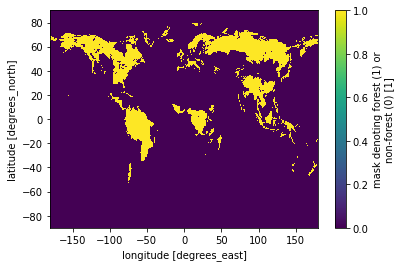

In [16]:
luh2_staticdata.fstnf.plot()

In [17]:
bareground_percent = fin1.PCT_NAT_PFT.isel(natpft=0) * landoceanmask
forest_pft_percent = fin4.PCT_NAT_PFT.isel(natpft=slice(1,None)) / fin4.PCT_NAT_PFT.isel(natpft=slice(1,None)).sum(dim='natpft') * 100. * landoceanmask
pasture_pft_percent = fin2.PCT_NAT_PFT.isel(natpft=slice(1,None)) / fin2.PCT_NAT_PFT.isel(natpft=slice(1,None)).sum(dim='natpft') * 100. * landoceanmask
other_pft_percent = fin3.PCT_NAT_PFT.isel(natpft=slice(1,None)) / fin3.PCT_NAT_PFT.isel(natpft=slice(1,None)).sum(dim='natpft') * 100. * landoceanmask


In [18]:
# primary_secondary_percent = (luh2_staticdata.fstnf * forest_pft_percent.fillna(0.) + (1.- luh2_staticdata.fstnf) * other_pft_percent.fillna(0.)) * landoceanmask

primary_secondary_percent = luh2_staticdata.fstnf * forest_pft_percent + (1.- luh2_staticdata.fstnf) * other_pft_percent


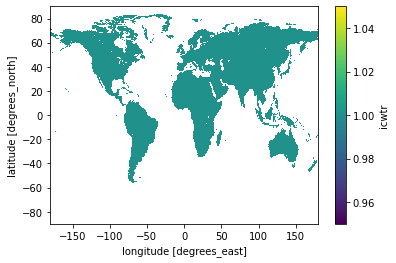

In [19]:
landoceanmask.plot()

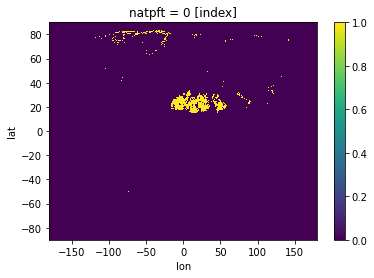

In [20]:
(bareground_percent == 100.).plot()

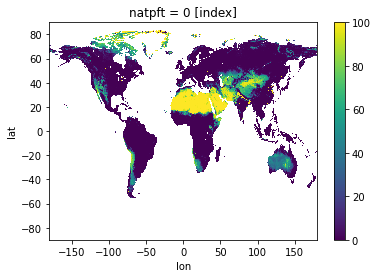

In [21]:
bareground_percent.plot()

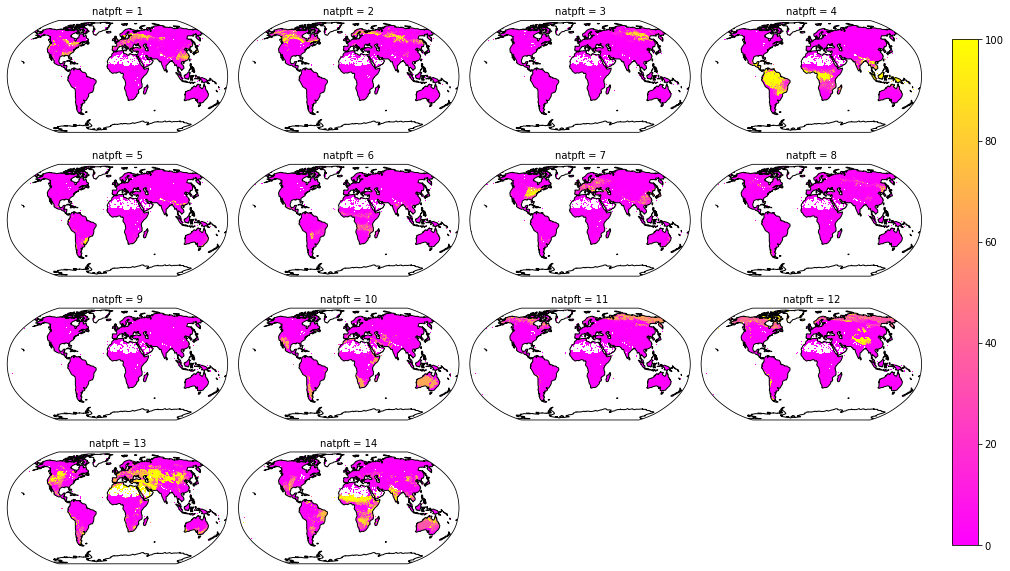

In [22]:
fg = primary_secondary_percent.plot(x='lon',y='lat',col='natpft', col_wrap=4, cmap=cmap, transform=ccrs.PlateCarree(), subplot_kws=dict(projection=ccrs.Robinson()), add_colorbar=False)

for ax in fg.axes.flat:
    ax.coastlines() 

# color bar
#fg.add_colorbar(orientation="horizontal", shrink=0.5, anchor=(0.5, -0.5))
fg.add_colorbar(orientation="vertical", shrink=0.6, anchor=(1.5, 0.5))

plt.subplots_adjust(hspace=-0.65)


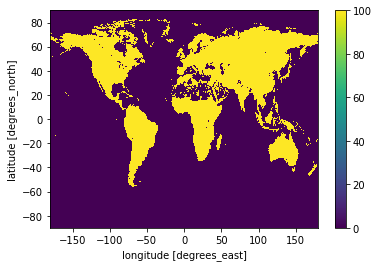

In [23]:
primary_secondary_percent.sum(dim='natpft').plot()

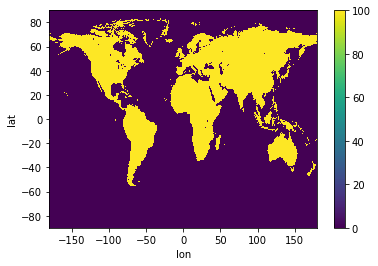

In [24]:
forest_pft_percent.sum(dim='natpft').plot()

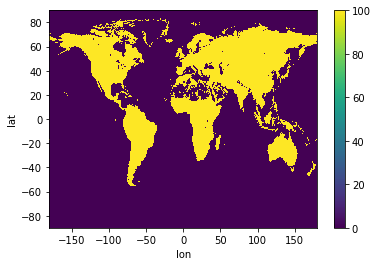

In [25]:
other_pft_percent.sum(dim='natpft').plot()

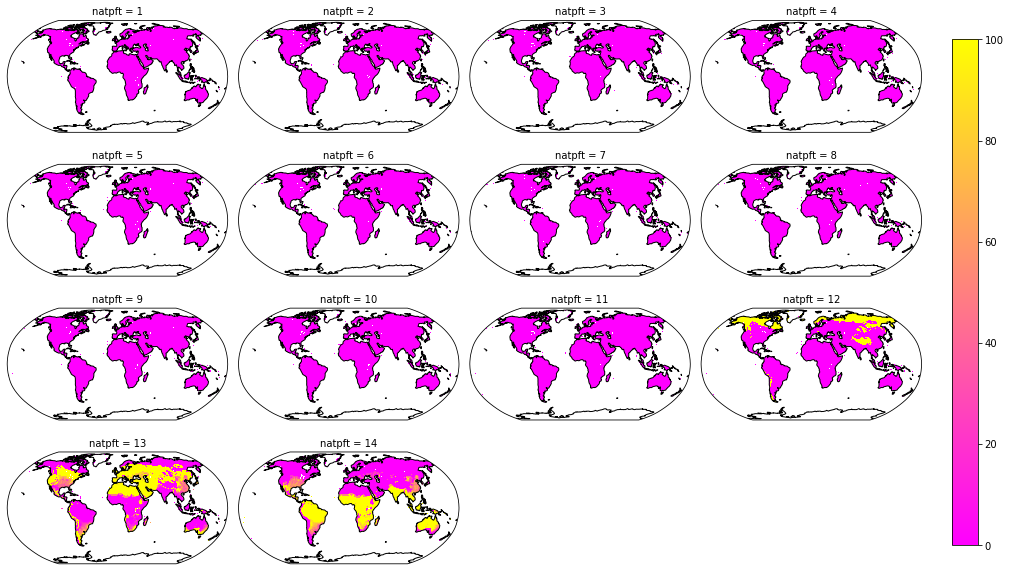

In [26]:
fg = pasture_pft_percent.plot(x='lon',y='lat',col='natpft', col_wrap=4, cmap=cmap, transform=ccrs.PlateCarree(), subplot_kws=dict(projection=ccrs.Robinson()), add_colorbar=False)

for ax in fg.axes.flat:
    ax.coastlines() 

# color bar
#fg.add_colorbar(orientation="horizontal", shrink=0.5, anchor=(0.5, -0.5))
fg.add_colorbar(orientation="vertical", shrink=0.6, anchor=(1.5, 0.5))

plt.subplots_adjust(hspace=-0.65)


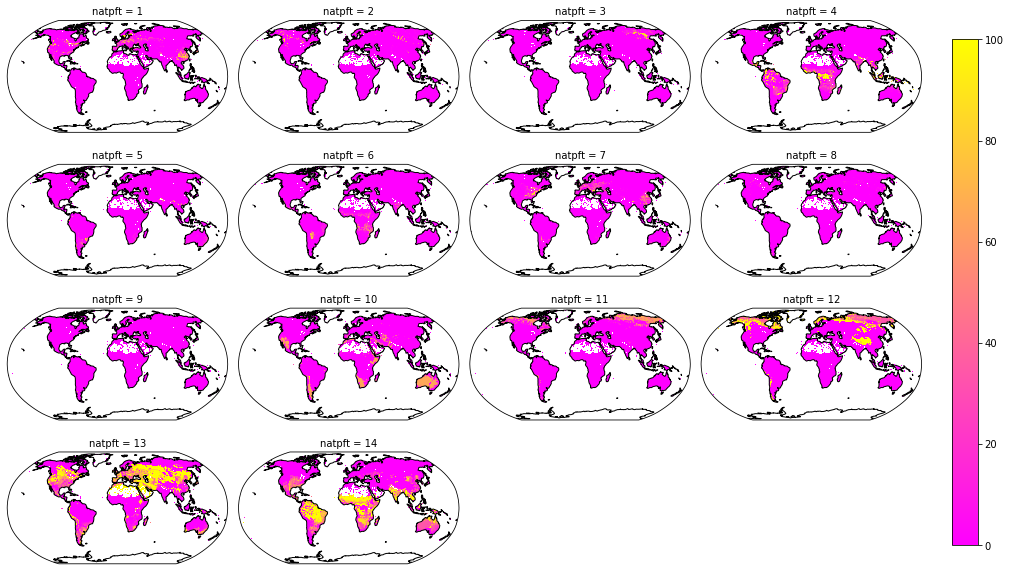

In [27]:
fg = other_pft_percent.plot(x='lon',y='lat',col='natpft', col_wrap=4, cmap=cmap, transform=ccrs.PlateCarree(), subplot_kws=dict(projection=ccrs.Robinson()), add_colorbar=False)

for ax in fg.axes.flat:
    ax.coastlines() 
    

# color bar
#fg.add_colorbar(orientation="horizontal", shrink=0.5, anchor=(0.5, -0.5))
fg.add_colorbar(orientation="vertical", shrink=0.6, anchor=(1.5, 0.5))

plt.subplots_adjust(hspace=-0.65)


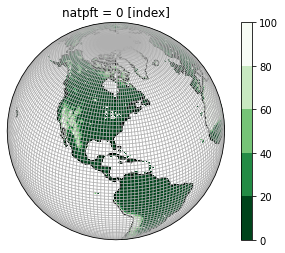

In [28]:
ax = plt.axes(projection=ccrs.Orthographic(-80, 35))
ax.set_global()
bareground_percent.plot.contourf(ax=ax, transform=ccrs.PlateCarree(), cmap='Greens_r')
ax.coastlines()
ax.gridlines(xlocs=np.arange(-180.,180.,2), ylocs=np.arange(-90.,90.,2.))

plt.savefig('global_grid.png', dpi=300)